Remeber uploading file Split_table_new_paras

# Necessary basic environment

In [2]:
import numpy as np
import pandas as pd
import random
from typing import (Optional,List)
import copy
import matplotlib.pyplot as plt
import decimal
from collections import defaultdict
import ast


In [3]:
class deck:
  def __init__(
      self,
      no_of_deck: Optional[int] = 1
  ) -> None :
    self.no_of_deck = no_of_deck
    self.deck_card = no_of_deck * 52
    self.deck = {
        '2': 4 * no_of_deck,
        '3': 4 * no_of_deck,
        '4': 4 * no_of_deck,
        '5': 4 * no_of_deck,
        '6': 4 * no_of_deck,
        '7': 4 * no_of_deck,
        '8': 4 * no_of_deck,
        '9': 4 * no_of_deck,
        '10': 4 * no_of_deck,
        'J': 4 * no_of_deck,
        'Q': 4 * no_of_deck,
        'K': 4 * no_of_deck,
        'A': 4 * no_of_deck
    }

  def _adj_ (
      self,
      target: str or int,
      value: int
    ):
    tar = self._convert_(target)
    self.deck_card += value
    self.deck[tar] = self.deck[tar] + value if self.deck[tar] + value >0 else 0

  def _get_deck_(self):
    return self.deck_card

  def _get_card_(
      self,
      target: str or int
    ):
    tar = self._convert_(target)
    return self.deck[tar]

  def _convert_(
      self,
      template: int
    ):
    if type(template) == int:
      tar = str(template)
    else:
      tar = template
    return tar


In [4]:
class blackjack:#No print
  def __init__(self,
        player_hand: Optional[List[str]] = None,
        dealer_hand: Optional[List[str]] = None,
        split_card: Optional[List[str]] = None,
        other_player_hand: Optional[List[List[str]]] = None,
        no_of_other_player_B4: int = 0,
        no_of_other_player_after: int =0,
        no_of_dealer: int = 1,
        no_of_deck: int = 1,
        splitCount: int = 0,
        strategy: str = 'H', #h is hit, S = stand, DD = double, Sp =split
        other_strategy: str = 'S'


        ) -> None:

        self.player_hand = player_hand if player_hand is not None else []
        self.dealer_hand = dealer_hand if dealer_hand is not None else []
        self.split_card = split_card if split_card is not None else []
        self.deck = deck(no_of_deck)
        self.no_other_player_B4 = no_of_other_player_B4
        self.no_other_player_after = no_of_other_player_after
        self.splitCount = 0
        self.player_score = 0
        self.player_score2 = 0
        #self.other_player_hand = other_player_hand \
        #print('qwe')
        if other_player_hand is None and self.no_other_player_after\
        + self.no_other_player_B4 > 0:
          #print('asd')
          self.other_player_hand = [[] for _ in range(self.no_other_player_after\
        + self.no_other_player_B4)]
        else:
          self.other_player_hand = other_player_hand

        #if other_player_hand is not None:
          #self.other_hand_hand = {}
          #for i in self.no_other_player_B4:
        self.other_strate = other_strategy
        self.no_deal = no_of_dealer
        self.strate = strategy


  def _dist_card_(self):

    drawn_card = random.choices(list(self.deck.deck.keys()),\
                    weights = list(self.deck.deck.values()), k=1)[0]
    #print(f"        card drawn: {drawn_card}")

#     print("       B4")
#     print(f"        {self.deck._get_deck_()}")
#     print(f"        {self.deck._get_card_(drawn_card)}")
#     print(f"        deck contains {self.deck.deck} \n")

#     print("       After")
    self.deck._adj_(drawn_card,-1)
#     print(f"        deck contains {self.deck.deck}")
#     print(f"        {self.deck._get_deck_()}")
#      print(f"        {self.deck._get_card_(drawn_card)}\n")

    return drawn_card

  def _update_ (self,
          input: List[str]
          ):
    for i in input:
#       print(f"        card in hand: {i}")
#       print("       B4")
#       print(f"        {self.deck._get_deck_()}")
#       print(f"        {self.deck._get_card_(i)}")
#       print(f"        deck contains {self.deck.deck}\n")

#       print("       After")
      self.deck._adj_(i,-1)
#       print(f"        {self.deck._get_deck_()}")
#       print(f"        {self.deck._get_card_(i)}")
#       print(f"        deck contains {self.deck.deck}\n")

  def _sort_cards_(self,cards: list[str]):
    order = {
        '1': 1,
        '2': 2,
        '3': 3,
        '4': 4,
        '5': 5,
        '6': 6,
        '7': 7,
        '8': 8,
        '9': 9,
        '10': 10,
        'J': 11,
        'Q': 12,
        'K': 13,
        'A': 14}
    return sorted(cards, key=order.get)

  def _check_score_ (self,
            hand: List[str]
            ):
    mapping = {
        '1': 1,
        '2': 2,
        '3': 3,
        '4': 4,
        '5': 5,
        '6': 6,
        '7': 7,
        '8': 8,
        '9': 9,
        '10': 10,
        'J': 10,
        'Q': 10,
        'K': 10

    }
    tot_score = 0
    sort_hand = self._sort_cards_(hand)
    #print(f"Sorted player hand: {sort_hand}")
    #mapping.get(template,'Probelm with _convert_')

    for card in sort_hand:
      if card != 'A':
        tot_score += mapping.get(card,"Incorrect value")
      elif card == 'A' and tot_score <= 10:
        tot_score += 11
      elif card == 'A' and tot_score >10:
        tot_score += 1
      else:
        raise Exception("An error occurred in _check_score_ function")
    return tot_score


  def _game_strate_ (self, input_strate: str, input_hand, splitCount: Optional[int] = 0):

    if input_strate == 'H':
      #print("Game Strategy: Hit")
      self._strate_hit_(input_hand)
      #print(f"New Player hand: {input_hand}")
    elif input_strate == 'S':
      #print("Game Strategy: Stand")
      True
    elif input_strate == 'DD':
      #print("Game Strategy: Double Down")
      self._strate_DoubleDown_(input_hand)
      #print(f"New Player hand: {input_hand}")
      # Tommy code
    elif input_strate == 'SP' and self.splitCount < 2:
      #print("Game Strategy: Split")
      self._strate_Split_(input_hand)

    else:
      #print(f"{input_strate} {input_hand}")
      raise Exception("An error occurred in _game_strate_ function")


  def _strate_hit_(self,
            input_hand: List[str]):
    input_hand.append(self._dist_card_())

  def _strate_DoubleDown_(self,
            input_hand: List[str]):
    if len(input_hand) == 2:
      input_hand.append(self._dist_card_())#####here

  def _strate_Split_(self,
            input_hand: List[str]):
    if len(input_hand) == 2 and input_hand[0].split()[0] == input_hand[1].split()[0]:
      self.split_card.append(input_hand.pop())
      input_hand.append(self._dist_card_())
      player_score = self._check_score_(input_hand)
      #print(f"Player First hand: {input_hand}\n")
      #print(f"Score: {player_score}")
      ##second hand
      self.split_card.append(self._dist_card_())
      #print(f"\nPlayer Second hand: {self.split_card}\n")
      player_score2 = self._check_score_(self.split_card)
      #print(f"Score: {self.player_score2}")
      return input_hand, self.split_card, player_score, player_score2
    else:
      print("You cannot split at this stage.")

  def game_start(self):
    # game start and update hand
    wins = 0
    losses = 0

    ## update player b4 main player
#     print(f"There are {self.no_other_player_B4} players b4 main player")
    if self.no_other_player_B4 != 0:
      #print('a')
      for i in self.other_player_hand[0:self.no_other_player_B4]:
        #print("b")
        #print(f"Updating other player hand: {i}")
        if not i:
          #print("Other player's hand is empty \n")
          i.append(self._dist_card_())
          i.append(self._dist_card_())
        elif len(i) == 1:
          #print("Other player hand have only one card \n")
          self._update_(i)
          i.append(self._dist_card_())
        else:
          print("Other player hand is NOT empty \n")
          self._update_(i)
        #print(f"Other B4 players' hand: {i} \n")
    #print("End other player b4 phrase \n")

    ## update main player
    if not self.player_hand:
      #print("Players' hand is empty")
      self.player_hand.append(self._dist_card_())
      self.player_hand.append(self._dist_card_())
    elif len(self.player_hand) == 1:
      #print("Player hand have only one card")
      self._update_(self.player_hand)
      self.player_hand.append(self._dist_card_())
    else:
      #print("Player hand is NOT empty")
      #print(f"Players' hand: {self.player_hand}")
      self._update_(self.player_hand)

    #print(f"Players' hand: {self.player_hand} \n")

    if self._check_score_(self.player_hand) == 21:
        #print("PLAYER WIN due to PERFECT HAND")
        wins += 1
        return 1, self._check_score_(self.player_hand)

    ## update player after main player
#     print(f"There are {self.no_other_player_after} players after main player")
    if self.no_other_player_after != 0:
      for j in self.other_player_hand[self.no_other_player_B4:\
                      (self.no_other_player_after+ self.no_other_player_B4)]:
        if not j:
          #print("Other player's hand is empty")
          j.append(self._dist_card_())
          j.append(self._dist_card_())
        elif len(j) == 1:
          #print("Other player hand have only one card")
          self._update_(j)
          j.append(self._dist_card_())
        else:
          #print("Other player hand is NOT empty")
          self._update_(j)
        #print(f"Other after players' hand: {j} \n")
#     print("End other player after phrase \n")

    ## update dealer

    if not self.dealer_hand:
      #print("Dealers' hand is empty")
      self.dealer_hand.append(self._dist_card_())
      self.dealer_hand.append(self._dist_card_())
    elif len(self.dealer_hand) == 1:
      #print("Dealer hand have only one card")
      self._update_(self.dealer_hand)
      self.dealer_hand.append(self._dist_card_())
    else:
      #print("Dealer hand not empty")
      self._update_(self.dealer_hand)

    #print(f"Dealers' hand: {self.dealer_hand} \n")

    # B4 player phrase
    #print(f"Before player phrase")
    if self.no_other_player_B4 !=0:

      for i in self.other_player_hand[0:self.no_other_player_B4]:
        self._game_strate_(self.other_strate,i)
        #print(f"Other B4 player hand: {i} \n")
#     else:
#       print("No b4 player \n")

    # player phrase:
    #print(f"Player phrase:")###here
    self._game_strate_(self.strate,self.player_hand)
    if not self.strate == 'SP':
      #print(f"Player hand: {self.player_hand}\n")
      if self._check_score_(self.player_hand) > 21:
        #print("PLAYER LOSE DUE TO BURST")
        losses += 1
        return -1,self._check_score_(self.player_hand)
    else:
      self.splitCount = self.splitCount + 1
      #print(f"Player First hand: {self.player_hand}\n")
      #print(f"\nPlayer Second hand: {self.split_card}\n")
      return 2, self.player_hand, self.split_card



    # After player phrase
    #print(f"After player phrase")
    if self.no_other_player_after !=0:

      for j in self.other_player_hand[self.no_other_player_B4: \
       (self.no_other_player_after + self.no_other_player_B4)]:
        self._game_strate_(self.other_strate,j)
        #print(f"Other after player hand: {j}\n")
    #else:
      #print("No after player\n")

    # dealer phrase:

    while self._check_score_(self.dealer_hand) < 17 or \
      self._check_score_(self.dealer_hand) < self._check_score_(self.player_hand):
#       print("Dealer Hits due to hand less than 17")
      self._strate_hit_(self.dealer_hand)
      if self._check_score_(self.dealer_hand) > 21:
#         print("PLAYER WIN due to Dealers'BURST")
        wins += 1
        #print(f"Dealer's hand: {self.dealer_hand}")
        return 1, self._check_score_(self.player_hand)


    # end phrase
#     print("End Phrase:")
#     print("    check PLAYER score")
    self.player_score = self._check_score_(self.player_hand)
    #print(f"    PLAYER score: {self.player_score} \n")

#     print("    check DEALER score")
    self.dealer_score = self._check_score_(self.dealer_hand)
    #print(f"    DEALER score: {self.dealer_score} \n")
    if self.dealer_score > 21:
      #print("Dealer LOSE DUE TO BURST")
      return 1, self._check_score_(self.player_hand)
    elif self.dealer_score > self.player_score and self.dealer_score < 22:
      #print("PLAYER LOSE due to dealer have higher point")
      losses += 1
      return -1, self._check_score_(self.player_hand)
    elif self.player_score > self.dealer_score and self.player_score < 22:
        #print("PLAYER WIN with higher point")
        wins += 1
        return 1, self._check_score_(self.player_hand)
    elif self.player_score == self.dealer_score:
      #print("DRAW due to same hand total")
      return 0, self._check_score_(self.player_hand)
    else:

      #print("idk")
      raise Exception("An error occurred due to UNKNOWN GAME COMCLUSION")
      #return 'idk'


    return wins, losses



# Single case testing(Hiting and DD)

Test with deck_no = {2-8}
Player_no = {2-6}

Our Initial Hand =
{['2','3'],['3','4'],['2','6'],['3','7'],['5','6'],['8','4'],['7','8'],['6','K'],['10','8'],['J','K'],['A','A'],['A','3'],['A','7']}

Dear fixed with one shown hand: '8'

In [ ]:
decks = [2,3,4,5,6,7,8]
playersNum= [2,3,4,5,6]
testingHand = [['2','3'],['3','3'],['3','4'],['2','6'],['4','5'],['3','7'],['5','6'],['8','4'],['4','9'],['6','8'],['7','8'],['6','K'],['9','8'],['10','8'],['9','10'],['J','K'],['A','10'],['A','A'],['A','3'],['A','7']]
results = []

In [ ]:
for deck_no in decks:
  for player_num in playersNum:
    for card_input in testingHand:
      rounds = 0
      prev_win_rate = 0
      ROC = 0#rate of change of win
      CROC = 1#Change of ROC
      prev_ROC = 1
      total_wins = 0
      tot_score = 0
      avg_score = 0
      while CROC > 0.001 or rounds < 100:
              #print("Test here2: ", dealer_inputs[i])
              player_hand_set = copy.deepcopy(card_input)

              y = blackjack(player_hand= player_hand_set, dealer_hand = ['8'], no_of_other_player_B4 = player_num, no_of_other_player_after = player_num, no_of_deck = deck_no,strategy='H')
              result, player_score = y.game_start()
              rounds = rounds + 1
              tot_score = player_score + tot_score
              avg_score = tot_score / rounds
              if result == 1:
                total_wins += 1

              win_rate = total_wins / rounds
              if abs(win_rate - prev_win_rate) !=0 :
                ROC = abs(win_rate - prev_win_rate)
                CROC = abs(1 - ROC / prev_ROC)
              prev_win_rate = win_rate
              if ROC !=0:
                prev_ROC = ROC
              else:
                prev_ROC = 1
              if rounds > 100 and CROC == 1:
                #print("Terminated as always 0\n","Rounds: ",rounds, "\nConverged Win Rate: ", win_rate,"\nROC: ",ROC)
                break
              elif rounds > 100 and CROC == 0:
                #print("Terminated as Player always win\n","Rounds: ",rounds, "\nConverged Win Rate: ", win_rate,"\nROC: ",ROC)
                break
              player_hand_set = copy.deepcopy(card_input)

      results.append([deck_no, player_num, card_input, win_rate, avg_score])
      #print('player_hand:',card_input,'\nConverged Win Rate: ', win_rate,"\nAVG HAND",avg_score)
      #print('deck:', deck_no,'player_num:',player_num)

              #print("Rounds: ",rounds, "\nConverged Win Rate: ", win_rate,"\nROC: ",ROC)


In [ ]:
results

[[2, 2, ['2', '3'], 0.2325, 12.462],
 [2, 2, ['3', '3'], 0.245, 13.339],
 [2, 2, ['3', '4'], 0.2478760619690155, 14.361319340329835],
 [2, 2, ['2', '6'], 0.3035, 15.3915],
 [2, 2, ['4', '5'], 0.5, 16.60144927536232],
 [2, 2, ['3', '7'], 0.5, 17.578125],
 [2, 2, ['5', '6'], 0.5125, 17.558],
 [2, 2, ['8', '4'], 0.2928535732133933, 18.530734632683657],
 [2, 2, ['4', '9'], 0.2683658170914543, 19.563218390804597],
 [2, 2, ['6', '8'], 0.254, 20.4485],
 [2, 2, ['7', '8'], 0.2410179640718563, 21.573353293413174],
 [2, 2, ['6', 'K'], 0.2255, 22.3765],
 [2, 2, ['9', '8'], 0.19740129935032483, 23.47326336831584],
 [2, 2, ['10', '8'], 0.1744127936031984, 24.547726136931534],
 [2, 2, ['9', '10'], 0.11794102948525736, 25.464267866066965],
 [2, 2, ['J', 'K'], 0.07296351824087956, 26.439780109945026],
 [2, 2, ['A', '10'], 1.0, 21.0],
 [2, 2, ['A', 'A'], 0.2815, 18.5155],
 [2, 2, ['A', '3'], 0.372, 16.0235],
 [2, 2, ['A', '7'], 0.381927109335996, 16.92760858711932],
 [2, 3, ['2', '3'], 0.24087956021989

In [ ]:
# Create a pandas DataFrame
df_h = pd.DataFrame(results, columns=['Deck#', 'Player#', 'Player_Hand', 'Converged Win Rate', 'AVG Score'])
df_h.set_index('Player_Hand', inplace=False)

# Convert DataFrame to CSV file
df_h.to_csv('Evaluation_Hit.csv')

Plotting for the converged win rate change and AVG score over different player# and Deck#

In [ ]:
df_h

,Deck#,Player#,Player_Hand,Converged Win Rate,AVG Score
0,2,2,"[2, 3]",0.232500,12.462000
1,2,2,"[3, 3]",0.245000,13.339000
2,2,2,"[3, 4]",0.247876,14.361319
3,2,2,"[2, 6]",0.303500,15.391500
4,2,2,"[4, 5]",0.500000,16.601449
...,...,...,...,...,...
695,8,6,"[J, K]",0.057971,26.540230
696,8,6,"[A, 10]",1.000000,21.000000
697,8,6,"[A, A]",0.292561,18.552172
698,8,6,"[A, 3]",0.373127,15.980519


In [ ]:
df_h['Player_Hand'].apply(lambda x: x == ['2', '3'])

0       True
1      False
2      False
3      False
4      False
       ...  
695    False
696    False
697    False
698    False
699    False
Name: Player_Hand, Length: 700, dtype: bool

Hypothesis Testing of Hiting strategy

/content/Evaluation_Samples/Single_case_HSDD_table.csv

In [ ]:
# Filter the DataFrame to include rows where deck number is 2, player number is 2, and player hand is 2 or 3
condition1 = (df_h['Player#'] == 2) & df_h['Player_Hand'].apply(lambda x: x == ['2', '3'])
filtered_df1 = df_h[condition1]

# Filter the DataFrame to include rows where deck number is 8, player number is 6, and player hand is 2 or 3
condition2 = (df_h['Player#'] == 6) & df_h['Player_Hand'].apply(lambda x: x == ['2', '3'])
filtered_df2 = df_h[condition2]

# Calculate the converged win rate for deck number 2 and player number 2
converged_win_rate1 = filtered_df1['Converged Win Rate'].mean()

# Calculate the converged win rate for deck number 8 and player number 6
converged_win_rate2 = filtered_df2['Converged Win Rate'].mean()

# Calculate the difference in converged win rates
win_rate_difference = converged_win_rate2 - converged_win_rate1

# Print the difference in converged win rates
print("Difference in converged win rates:", win_rate_difference)

Difference in converged win rates: -0.00121186054037134


In [ ]:
from scipy.stats import ttest_ind

# Filter the DataFrame to include rows where player number is 2
condition1 = (df_h['Player#'] == 2) & df_h['Player_Hand'].apply(lambda x: x == ['2', '3'])
filtered_df1 = df_h[condition1]

condition2 = (df_h['Player#'] == 6) & df_h['Player_Hand'].apply(lambda x: x == ['2', '3'])
filtered_df2 = df_h[condition2]

# Extract the converged win rates for each condition
converged_win_rates1 = filtered_df1['Converged Win Rate']
converged_win_rates2 = filtered_df2['Converged Win Rate']

# Perform independent t-test
t_statistic, p_value = ttest_ind(converged_win_rates1, converged_win_rates2, equal_var=False)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 0.21868369257768414
P-Value: 0.830739536496803


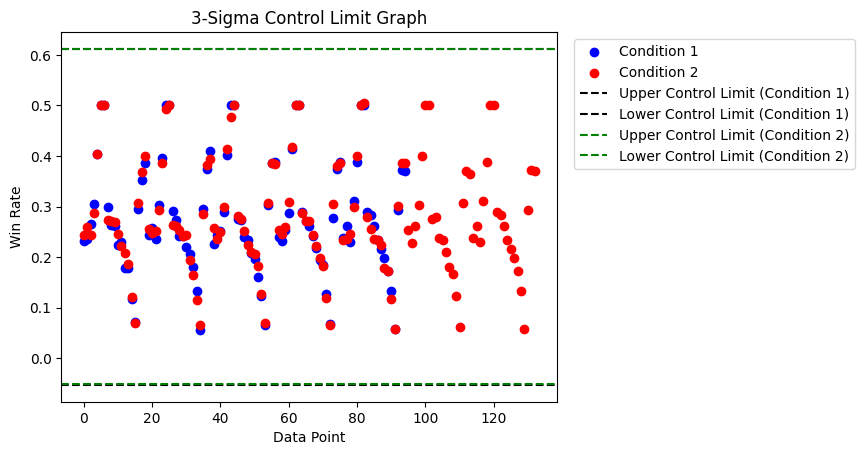

In [36]:
# Filter the DataFrame to include rows where player number is 2
condition1 = (df_h['Deck#'] == 8) & df_h['Player_Hand'].apply(lambda x: x != ['A', '10'])
filtered_df1 = df_h[condition1]

condition2 = (df_h['Player#'] == 6) & df_h['Player_Hand'].apply(lambda x: x != ['A', '10'])
filtered_df2 = df_h[condition2]

# Extract the converged win rates for each condition
converged_win_rates1 = filtered_df1['Converged Win Rate']
converged_win_rates2 = filtered_df2['Converged Win Rate']
# Calculate the mean and standard deviation
mean1 = np.mean(converged_win_rates1)
mean2 = np.mean(converged_win_rates2)
std_dev1 = np.std(converged_win_rates1)
std_dev2 = np.std(converged_win_rates2)

# Calculate the upper and lower control limits
upper_limit1 = mean1 + (3 * std_dev1)
lower_limit1 = mean1 - (3 * std_dev1)
upper_limit2 = mean2 + (3 * std_dev2)
lower_limit2 = mean2 - (3 * std_dev2)

# Create a figure and axis
fig, ax = plt.subplots()

# Scatter plot of the win rates
ax.scatter(range(len(converged_win_rates1)), converged_win_rates1, color='blue', label='Condition 1')
ax.scatter(range(len(converged_win_rates2)), converged_win_rates2, color='red', label='Condition 2')

# Plot the control limits
ax.axhline(upper_limit1, color='black', linestyle='--', label='Upper Control Limit (Condition 1)')
ax.axhline(lower_limit1, color='black', linestyle='--', label='Lower Control Limit (Condition 1)')
ax.axhline(upper_limit2, color='green', linestyle='--', label='Upper Control Limit (Condition 2)')
ax.axhline(lower_limit2, color='green', linestyle='--', label='Lower Control Limit (Condition 2)')

# Set the x-axis label
ax.set_xlabel('Data Point')

# Set the y-axis label
ax.set_ylabel('Win Rate')

# Set the title
ax.set_title('3-Sigma Control Limit Graph')

# Add a legend
# Move the legend outside of the graph area
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1))

# Show the plot
plt.show()

In [ ]:

# Filter the DataFrame to include rows where Deck number is 2
condition1 = (df_h['Deck#'] == 2) & df_h['Player_Hand'].apply(lambda x: x == ['2', '3'])
filtered_df1 = df_h[condition1]


condition2 = (df_h['Deck#'] == 8) & df_h['Player_Hand'].apply(lambda x: x == ['2', '3'])
filtered_df2 = df_h[condition2]

# Extract the converged win rates for each condition
converged_win_rates1 = filtered_df1['Converged Win Rate']
converged_win_rates2 = filtered_df2['Converged Win Rate']

# Perform independent t-test
t_statistic, p_value = ttest_ind(converged_win_rates1, converged_win_rates2, equal_var=False)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 1.5264557039704125
P-Value: 0.16840891097316527


In [ ]:

condition1 = (df_h['Player#'] == 2) & df_h['Player_Hand'].apply(lambda x: x == ['J', 'K'])
filtered_df1 = df_h[condition1]

condition2 = (df_h['Player#'] == 6) & df_h['Player_Hand'].apply(lambda x: x == ['J', 'K'])
filtered_df2 = df_h[condition2]

# Extract the converged win rates for each condition
converged_win_rates1 = filtered_df1['Converged Win Rate']
converged_win_rates2 = filtered_df2['Converged Win Rate']

# Perform independent t-test
t_statistic, p_value = ttest_ind(converged_win_rates1, converged_win_rates2, equal_var=False)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 1.8761571695553327
P-Value: 0.08580059601768537


In [ ]:
condition1 = (df_h['Deck#'] == 2) & df_h['Player_Hand'].apply(lambda x: x == ['J', 'K'])
filtered_df1 = df_h[condition1]

condition2 = (df_h['Deck#'] == 8) & df_h['Player_Hand'].apply(lambda x: x == ['J', 'K'])
filtered_df2 = df_h[condition2]

# Extract the converged win rates for each condition
converged_win_rates1 = filtered_df1['Converged Win Rate']
converged_win_rates2 = filtered_df2['Converged Win Rate']

# Perform independent t-test
t_statistic, p_value = ttest_ind(converged_win_rates1, converged_win_rates2, equal_var=False)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 0.9267776788935995
P-Value: 0.3823936877651306


# Plots for Hitting

In [31]:
df_h = pd.read_csv('/content/Evaluation_Hit.csv')

# Convert the elements in the 'Player_Hand' column to a list of strings
df_h['Player_Hand'] = df_h['Player_Hand'].apply(ast.literal_eval)

# Verify the updated 'Player_Hand' column
print(df_h['Player_Hand'])

0       [2, 3]
1       [3, 3]
2       [3, 4]
3       [2, 6]
4       [4, 5]
        ...   
695     [J, K]
696    [A, 10]
697     [A, A]
698     [A, 3]
699     [A, 7]
Name: Player_Hand, Length: 700, dtype: object


[2,3] plots

In [19]:
print(df_h.columns)

Index(['Unnamed: 0', 'Deck#', 'Player#', 'Player_Hand', 'Converged Win Rate',
       'AVG Score'],
      dtype='object')


In [20]:
df_h['Player_Hand'].apply(lambda x: x == ['2', '3'])

0       True
1      False
2      False
3      False
4      False
       ...  
695    False
696    False
697    False
698    False
699    False
Name: Player_Hand, Length: 700, dtype: bool

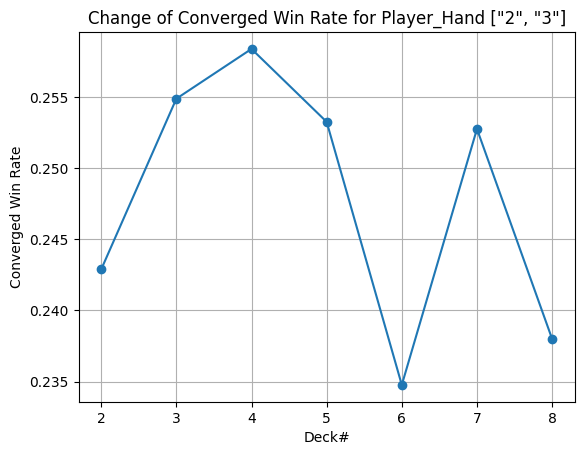

In [ ]:
# Filter the data for Player_Hand = ['2', '3'] and Player# = 6
filtered_data = df_h[(df_h['Player_Hand'].apply(lambda x: x == ['2', '3'])) & (df_h['Player#'] == 6)]

# Plotting the line graph
plt.plot(filtered_data['Deck#'], filtered_data['Converged Win Rate'], marker='o')
plt.xlabel('Deck#')
plt.ylabel('Converged Win Rate')
plt.title('Change of Converged Win Rate for Player_Hand ["2", "3"]')
plt.grid(True)
plt.show()

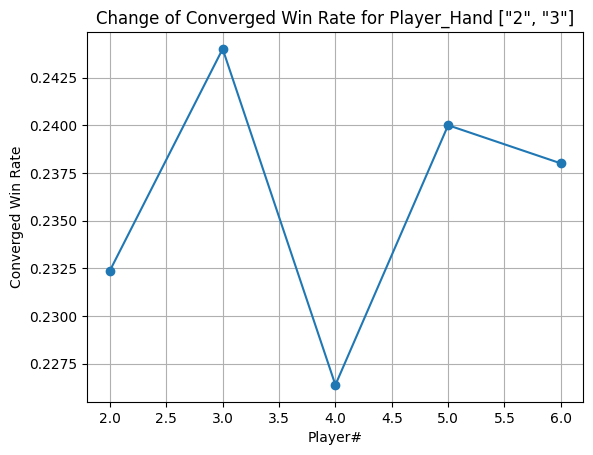

In [ ]:

filtered_data = df_h[(df_h['Player_Hand'].apply(lambda x: x == ['2', '3'])) & (df_h['Deck#'] == 8)]

# Plotting the line graph
plt.plot(filtered_data['Player#'], filtered_data['Converged Win Rate'], marker='o')
plt.xlabel('Player#')
plt.ylabel('Converged Win Rate')
plt.title('Change of Converged Win Rate for Player_Hand ["2", "3"]')
plt.grid(True)
plt.show()

# [10,8]Plots

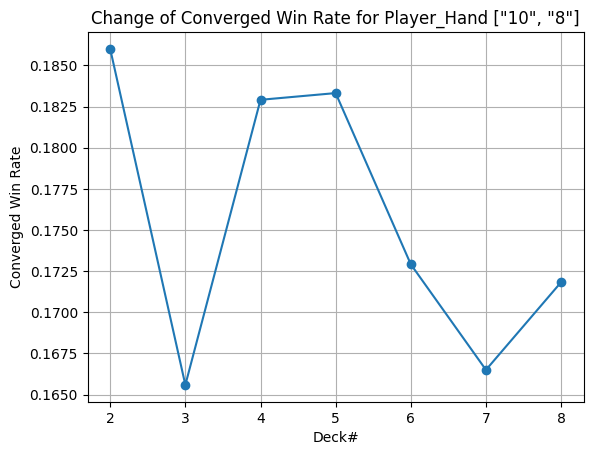

In [32]:
# Filter the data for Player_Hand = ['10', '8'] and Player# = 6
filtered_data = df_h[(df_h['Player_Hand'].apply(lambda x: x == ['10', '8'])) & (df_h['Player#'] == 6)]

# Plotting the line graph
plt.plot(filtered_data['Deck#'], filtered_data['Converged Win Rate'], marker='o')
plt.xlabel('Deck#')
plt.ylabel('Converged Win Rate')
plt.title('Change of Converged Win Rate for Player_Hand ["10", "8"]')
plt.grid(True)
plt.show()

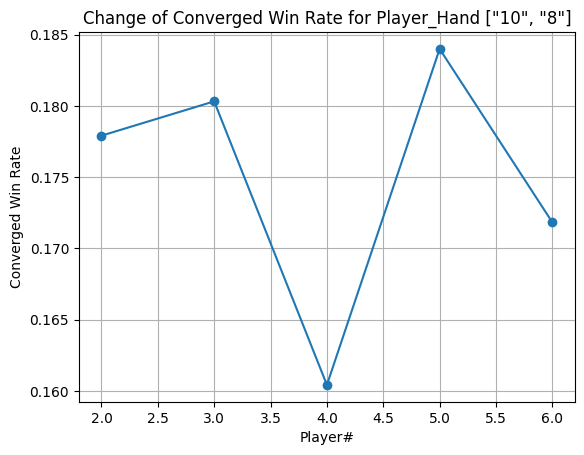

In [25]:
# Filter the data for Player_Hand = ['10', '8'] and Deck# = 8
filtered_data = df_h[(df_h['Player_Hand'].apply(lambda x: x == ['10', '8'])) & (df_h['Deck#'] == 8)]

# Plotting the line graph
plt.plot(filtered_data['Player#'], filtered_data['Converged Win Rate'], marker='o')
plt.xlabel('Player#')
plt.ylabel('Converged Win Rate')
plt.title('Change of Converged Win Rate for Player_Hand ["10", "8"]')
plt.grid(True)
plt.show()

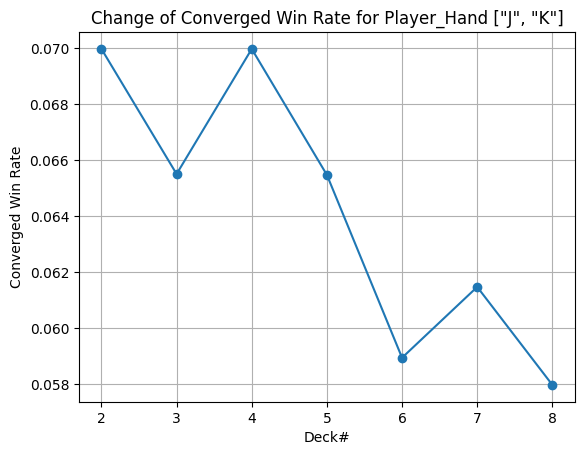

In [33]:
# Filter the data for Player_Hand = ['J', 'K'] and Player# = 6
filtered_data = df_h[(df_h['Player_Hand'].apply(lambda x: x == ['J', 'K'])) & (df_h['Player#'] == 6)]

# Plotting the line graph
plt.plot(filtered_data['Deck#'], filtered_data['Converged Win Rate'], marker='o')
plt.xlabel('Deck#')
plt.ylabel('Converged Win Rate')
plt.title('Change of Converged Win Rate for Player_Hand ["J", "K"]')
plt.grid(True)
plt.show()

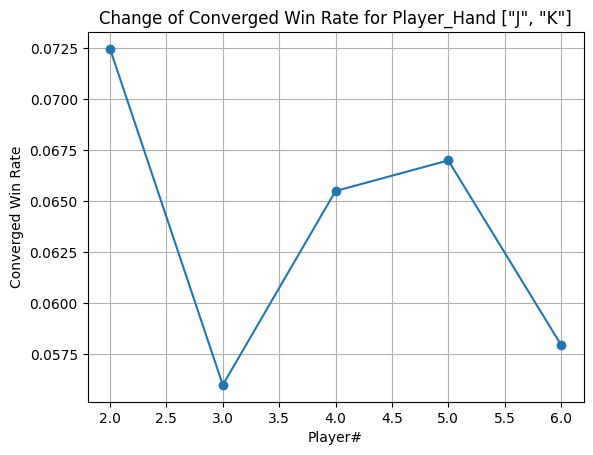

In [34]:
# Filter the data for Player_Hand = ['J', 'K'] and Player# = 6
filtered_data = df_h[(df_h['Player_Hand'].apply(lambda x: x == ['J', 'K'])) & (df_h['Deck#'] == 8)]

# Plotting the line graph
plt.plot(filtered_data['Player#'], filtered_data['Converged Win Rate'], marker='o')
plt.xlabel('Player#')
plt.ylabel('Converged Win Rate')
plt.title('Change of Converged Win Rate for Player_Hand ["J", "K"]')
plt.grid(True)
plt.show()

# Stand

Test with deck_no = {2-8}
Player_no = {2-6}

Our Initial Hand =
{['2','3'],['3','4'],['2','6'],['3','7'],['5','6'],['8','4'],['7','8'],['6','K'],['10','8'],['J','K'],['A','A'],['A','3'],['A','7']}

Dear fixed with one shown hand: '8'

In [ ]:
decks = [2,3,4,5,6,7,8]
playersNum= [2,3,4,5,6]
testingHand = [['2','3'],['3','3'],['3','4'],['2','6'],['4','5'],['3','7'],['5','6'],['8','4'],['4','9'],['6','8'],['7','8'],['6','K'],['9','8'],['10','8'],['9','10'],['J','K'],['A','10'],['A','A'],['A','3'],['A','7']]
results = []

In [ ]:
for deck_no in decks:
  for player_num in playersNum:
    for card_input in testingHand:
      rounds = 0
      prev_win_rate = 0
      ROC = 0#rate of change of win
      CROC = 1#Change of ROC
      prev_ROC = 1
      total_wins = 0
      tot_score = 0
      avg_score = 0
      while CROC > 0.001 or rounds < 100:
              #print("Test here2: ", dealer_inputs[i])
              player_hand_set = copy.deepcopy(card_input)

              y = blackjack(player_hand= player_hand_set, dealer_hand = ['8'], no_of_other_player_B4 = player_num, no_of_other_player_after = player_num, no_of_deck = deck_no,strategy='S')
              result, player_score = y.game_start()
              rounds = rounds + 1
              tot_score = player_score + tot_score
              avg_score = tot_score / rounds
              if result == 1:
                total_wins += 1

              win_rate = total_wins / rounds
              if abs(win_rate - prev_win_rate) !=0 :
                ROC = abs(win_rate - prev_win_rate)
                CROC = abs(1 - ROC / prev_ROC)
              prev_win_rate = win_rate
              if ROC !=0:
                prev_ROC = ROC
              else:
                prev_ROC = 1
              if rounds > 100 and CROC == 1:
                #print("Terminated as always 0\n","Rounds: ",rounds, "\nConverged Win Rate: ", win_rate,"\nROC: ",ROC)
                break
              elif rounds > 100 and CROC == 0:
                #print("Terminated as Player always win\n","Rounds: ",rounds, "\nConverged Win Rate: ", win_rate,"\nROC: ",ROC)
                break
              player_hand_set = copy.deepcopy(card_input)

      results.append([deck_no, player_num, card_input, win_rate, avg_score])
      #print('player_hand:',card_input,'\nConverged Win Rate: ', win_rate,"\nAVG HAND",avg_score)
      #print('deck:', deck_no,'player_num:',player_num)

              #print("Rounds: ",rounds, "\nConverged Win Rate: ", win_rate,"\nROC: ",ROC)


In [ ]:
results

[[2, 2, ['2', '3'], 0.22638680659670166, 5.0],
 [2, 2, ['3', '3'], 0.26073926073926074, 6.0],
 [2, 2, ['3', '4'], 0.24, 7.0],
 [2, 2, ['2', '6'], 0.235, 8.0],
 [2, 2, ['4', '5'], 0.2513743128435782, 9.0],
 [2, 2, ['3', '7'], 0.22977022977022976, 10.0],
 [2, 2, ['5', '6'], 0.242, 11.0],
 [2, 2, ['8', '4'], 0.2285, 12.0],
 [2, 2, ['4', '9'], 0.23526473526473526, 13.0],
 [2, 2, ['6', '8'], 0.24087956021989004, 14.0],
 [2, 2, ['7', '8'], 0.23888055972013994, 15.0],
 [2, 2, ['6', 'K'], 0.242, 16.0],
 [2, 2, ['9', '8'], 0.2255, 17.0],
 [2, 2, ['10', '8'], 0.32233883058470764, 18.0],
 [2, 2, ['9', '10'], 0.6071964017991005, 19.0],
 [2, 2, ['J', 'K'], 0.7382617382617382, 20.0],
 [2, 2, ['A', '10'], 1.0, 21.0],
 [2, 2, ['A', 'A'], 0.23092269326683293, 12.0],
 [2, 2, ['A', '3'], 0.262, 14.0],
 [2, 2, ['A', '7'], 0.341, 18.0],
 [2, 3, ['2', '3'], 0.23952095808383234, 5.0],
 [2, 3, ['3', '3'], 0.251, 6.0],
 [2, 3, ['3', '4'], 0.2345, 7.0],
 [2, 3, ['2', '6'], 0.26023976023976025, 8.0],
 [2, 3, ['4

In [ ]:
# Create a pandas DataFrame
df_s = pd.DataFrame(results, columns=['Deck#', 'Player#', 'Player_Hand', 'Converged Win Rate', 'AVG Score'])
df_s.set_index('Player_Hand', inplace=False)

# Convert DataFrame to CSV file
df_s.to_csv('Evaluation_Stand.csv')

Plotting for the converged win rate change and AVG score over different player# and Deck#

In [ ]:
df_s

,Deck#,Player#,Player_Hand,Converged Win Rate,AVG Score
0,2,2,"[2, 3]",0.226387,5.0
1,2,2,"[3, 3]",0.260739,6.0
2,2,2,"[3, 4]",0.240000,7.0
3,2,2,"[2, 6]",0.235000,8.0
4,2,2,"[4, 5]",0.251374,9.0
...,...,...,...,...,...
695,8,6,"[J, K]",0.757485,20.0
696,8,6,"[A, 10]",1.000000,21.0
697,8,6,"[A, A]",0.230385,12.0
698,8,6,"[A, 3]",0.252874,14.0


# Plots for Stand

In [5]:
df_s = pd.read_csv('/content/Evaluation_Stand.csv')

# Convert the elements in the 'Player_Hand' column to a list of strings
df_s['Player_Hand'] = df_s['Player_Hand'].apply(ast.literal_eval)

# Verify the updated 'Player_Hand' column
print(df_s['Player_Hand'])

0       [2, 3]
1       [3, 3]
2       [3, 4]
3       [2, 6]
4       [4, 5]
        ...   
695     [J, K]
696    [A, 10]
697     [A, A]
698     [A, 3]
699     [A, 7]
Name: Player_Hand, Length: 700, dtype: object


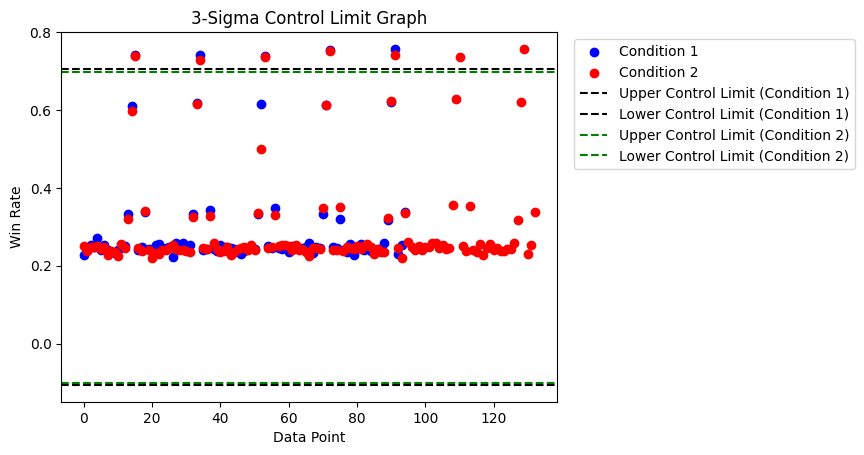

In [72]:
# Filter the DataFrame to include rows where player number is 2
condition1 = (df_s['Deck#'] == 8) & df_s['Player_Hand'].apply(lambda x: x != ['A', '10'])
filtered_df1 = df_s[condition1]

condition2 = (df_s['Player#'] == 6) & df_s['Player_Hand'].apply(lambda x: x != ['A', '10'])
filtered_df2 = df_s[condition2]

# Extract the converged win rates for each condition
converged_win_rates1 = filtered_df1['Converged Win Rate']
converged_win_rates2 = filtered_df2['Converged Win Rate']
# Calculate the mean and standard deviation
mean1 = np.mean(converged_win_rates1)
mean2 = np.mean(converged_win_rates2)
std_dev1 = np.std(converged_win_rates1)
std_dev2 = np.std(converged_win_rates2)

# Calculate the upper and lower control limits
upper_limit1 = mean1 + (3 * std_dev1)
lower_limit1 = mean1 - (3 * std_dev1)
upper_limit2 = mean2 + (3 * std_dev2)
lower_limit2 = mean2 - (3 * std_dev2)

# Create a figure and axis
fig, ax = plt.subplots()

# Scatter plot of the win rates
ax.scatter(range(len(converged_win_rates1)), converged_win_rates1, color='blue', label='Condition 1')
ax.scatter(range(len(converged_win_rates2)), converged_win_rates2, color='red', label='Condition 2')

# Plot the control limits
ax.axhline(upper_limit1, color='black', linestyle='--', label='Upper Control Limit (Condition 1)')
ax.axhline(lower_limit1, color='black', linestyle='--', label='Lower Control Limit (Condition 1)')
ax.axhline(upper_limit2, color='green', linestyle='--', label='Upper Control Limit (Condition 2)')
ax.axhline(lower_limit2, color='green', linestyle='--', label='Lower Control Limit (Condition 2)')

# Set the x-axis label
ax.set_xlabel('Data Point')

# Set the y-axis label
ax.set_ylabel('Win Rate')

# Set the title
ax.set_title('3-Sigma Control Limit Graph')

# Add a legend
# Move the legend outside of the graph area
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1))

# Show the plot
plt.show()

In [73]:
# Create empty lists to store out-of-bound data points
out_of_bounds1 = []
out_of_bounds2 = []

# Iterate over the win rates and check if they are outside the control limits
for i, win_rate in enumerate(converged_win_rates1):
    if win_rate > upper_limit1 or win_rate < lower_limit1:
        out_of_bounds1.append(i)

for i, win_rate in enumerate(converged_win_rates2):
    if win_rate > upper_limit2 or win_rate < lower_limit2:
        out_of_bounds2.append(i)

# Print the out-of-bound data points
print("Out-of-Bound Data Points for Condition 1:", out_of_bounds1)
print("Out-of-Bound Data Points for Condition 2:", out_of_bounds2)

Out-of-Bound Data Points for Condition 1: [15, 34, 53, 72, 91]
Out-of-Bound Data Points for Condition 2: [15, 34, 53, 72, 91, 110, 129]


In [74]:
filtered_df1['index'] = pd.RangeIndex(start=0, stop=len(filtered_df1), step=1)

<ipython-input-74-5ac2014843a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['index'] = pd.RangeIndex(start=0, stop=len(filtered_df1), step=1)


In [75]:
filtered_df2['index'] = pd.RangeIndex(start=0, stop=len(filtered_df2), step=1)

<ipython-input-75-85e4bd64118c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['index'] = pd.RangeIndex(start=0, stop=len(filtered_df2), step=1)


In [84]:
# Create empty lists to store out-of-bound data points
out_of_bounds1 = []
out_of_bounds2 = []
filtered_df1 = filtered_df1.drop('Unnamed: 0', axis=1)
filtered_df2 = filtered_df2.drop('Unnamed: 0', axis=1)
# Iterate over the win rates and check if they are outside the control limits
for i, win_rate in enumerate(converged_win_rates1):
    if win_rate > upper_limit1 or win_rate < lower_limit1:
        out_of_bounds1.append(i)

for i, win_rate in enumerate(converged_win_rates2):
    if win_rate > upper_limit2 or win_rate < lower_limit2:
        out_of_bounds2.append(i)

for i in range(len(out_of_bounds1)):
  out_of_bounds1[i] = filtered_df1[filtered_df1['index'].apply(lambda x: x == out_of_bounds1[i])]


for i in range(len(out_of_bounds2)):
  out_of_bounds2[i] = filtered_df2[filtered_df2['index'].apply(lambda x: x == out_of_bounds2[i])]

# Iterate over the columns in the DataFrame


In [85]:
out_of_bounds1

[     Deck#  Player# Player_Hand  Converged Win Rate  AVG Score  index
 615      8        2      [J, K]              0.7425       20.0     15,
      Deck#  Player# Player_Hand  Converged Win Rate  AVG Score  index
 635      8        3      [J, K]            0.743128       20.0     34,
      Deck#  Player# Player_Hand  Converged Win Rate  AVG Score  index
 655      8        4      [J, K]               0.739       20.0     53,
      Deck#  Player# Player_Hand  Converged Win Rate  AVG Score  index
 675      8        5      [J, K]            0.753623       20.0     72,
      Deck#  Player# Player_Hand  Converged Win Rate  AVG Score  index
 695      8        6      [J, K]            0.757485       20.0     91]

In [87]:
out_of_bounds2

[    Deck#  Player# Player_Hand  Converged Win Rate  AVG Score  index
 95      2        6      [J, K]             0.73963       20.0     15,
      Deck#  Player# Player_Hand  Converged Win Rate  AVG Score  index
 195      3        6      [J, K]            0.727908       20.0     34,
      Deck#  Player# Player_Hand  Converged Win Rate  AVG Score  index
 295      4        6      [J, K]              0.7355       20.0     53,
      Deck#  Player# Player_Hand  Converged Win Rate  AVG Score  index
 395      5        6      [J, K]            0.751748       20.0     72,
      Deck#  Player# Player_Hand  Converged Win Rate  AVG Score  index
 495      6        6      [J, K]            0.740759       20.0     91,
      Deck#  Player# Player_Hand  Converged Win Rate  AVG Score  index
 595      7        6      [J, K]            0.736632       20.0    110,
      Deck#  Player# Player_Hand  Converged Win Rate  AVG Score  index
 695      8        6      [J, K]            0.757485       20.0    129]

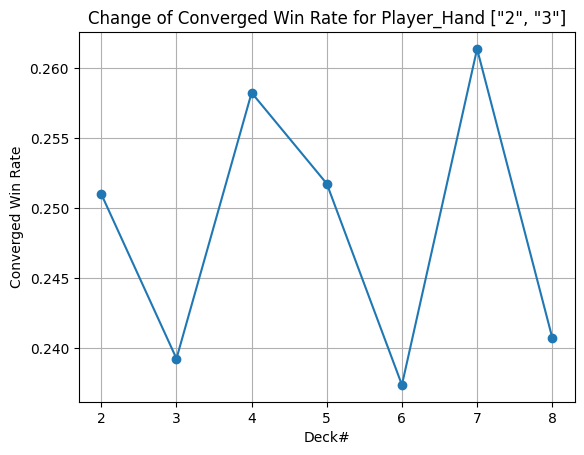

In [6]:
filtered_data = df_s[(df_s['Player_Hand'].apply(lambda x: x == ['2', '3'])) & (df_s['Player#'] == 6)]

# Plotting the line graph
plt.plot(filtered_data['Deck#'], filtered_data['Converged Win Rate'], marker='o')
plt.xlabel('Deck#')
plt.ylabel('Converged Win Rate')
plt.title('Change of Converged Win Rate for Player_Hand ["2", "3"]')
plt.grid(True)
plt.show()

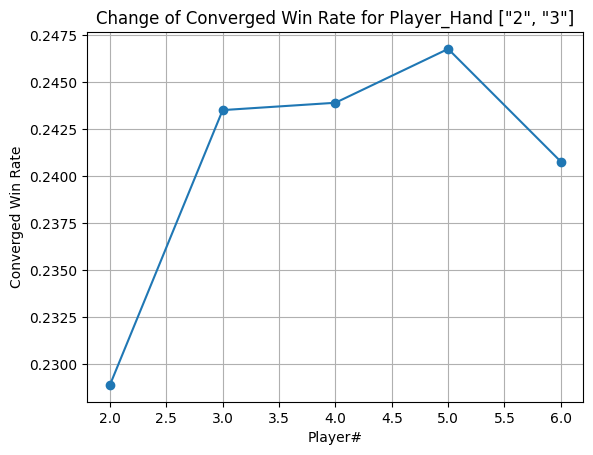

In [ ]:

filtered_data = df_s[(df_s['Player_Hand'].apply(lambda x: x == ['2', '3'])) & (df_s['Deck#'] == 8)]

# Plotting the line graph
plt.plot(filtered_data['Player#'], filtered_data['Converged Win Rate'], marker='o')
plt.xlabel('Player#')
plt.ylabel('Converged Win Rate')
plt.title('Change of Converged Win Rate for Player_Hand ["2", "3"]')
plt.grid(True)
plt.show()

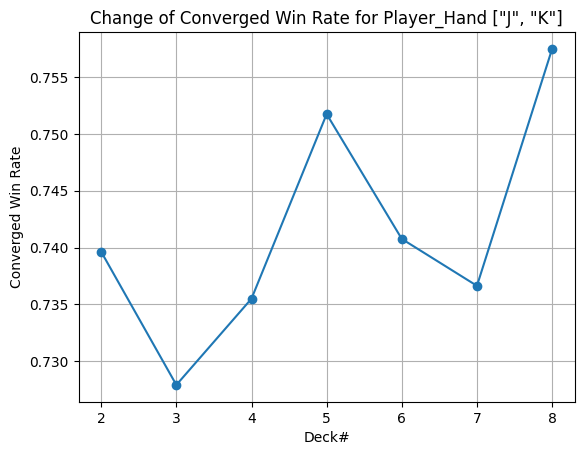

In [8]:
filtered_data = df_s[(df_s['Player_Hand'].apply(lambda x: x == ['J', 'K'])) & (df_s['Player#'] == 6)]

# Plotting the line graph
plt.plot(filtered_data['Deck#'], filtered_data['Converged Win Rate'], marker='o')
plt.xlabel('Deck#')
plt.ylabel('Converged Win Rate')
plt.title('Change of Converged Win Rate for Player_Hand ["J", "K"]')
plt.grid(True)
plt.show()

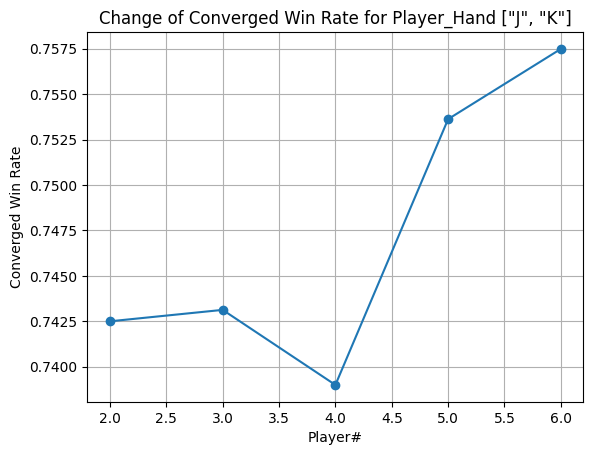

In [ ]:

filtered_data = df_s[(df_s['Player_Hand'].apply(lambda x: x == ['J', 'K'])) & (df_s['Deck#'] == 8)]

# Plotting the line graph
plt.plot(filtered_data['Player#'], filtered_data['Converged Win Rate'], marker='o')
plt.xlabel('Player#')
plt.ylabel('Converged Win Rate')
plt.title('Change of Converged Win Rate for Player_Hand ["J", "K"]')
plt.grid(True)
plt.show()

# Overall Performance

In [28]:
df_h = pd.read_csv('/content/Evaluation_Hit.csv')

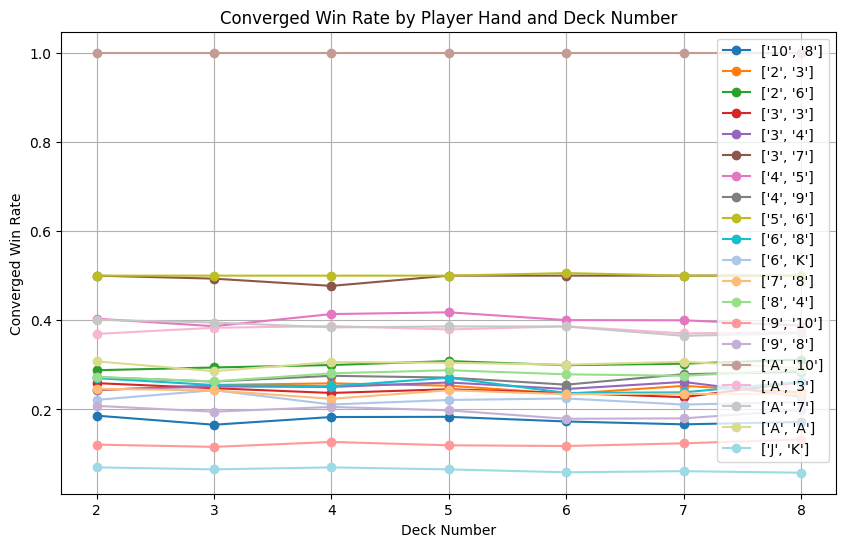

In [29]:
# Convert the 'Player_Hand' column values to strings
df_h['Player_Hand'] = df_h['Player_Hand'].astype(str)

# Filter the DataFrame to include rows where player number is equal to 2
filtered_df = df_h[df_h['Player#'] == 6]

# Group the filtered DataFrame by player hand
grouped_df = filtered_df.groupby('Player_Hand')

# Set up the plot
plt.figure(figsize=(10, 6))
colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5',
    '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5'
]  # Specify colors for each player hand

# Iterate over each player hand and plot the line graph
for i, (player_hand, data) in enumerate(grouped_df):
    x = data['Deck#']
    y = data['Converged Win Rate']
    color = colors[i % len(colors)]  # Use a color from the specified color list

    plt.plot(x, y, marker='o', linestyle='-', color=color, label=player_hand)

# Set the plot title and labels
plt.title('Converged Win Rate by Player Hand and Deck Number')
plt.xlabel('Deck Number')
plt.ylabel('Converged Win Rate')

# Add a legend and grid
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

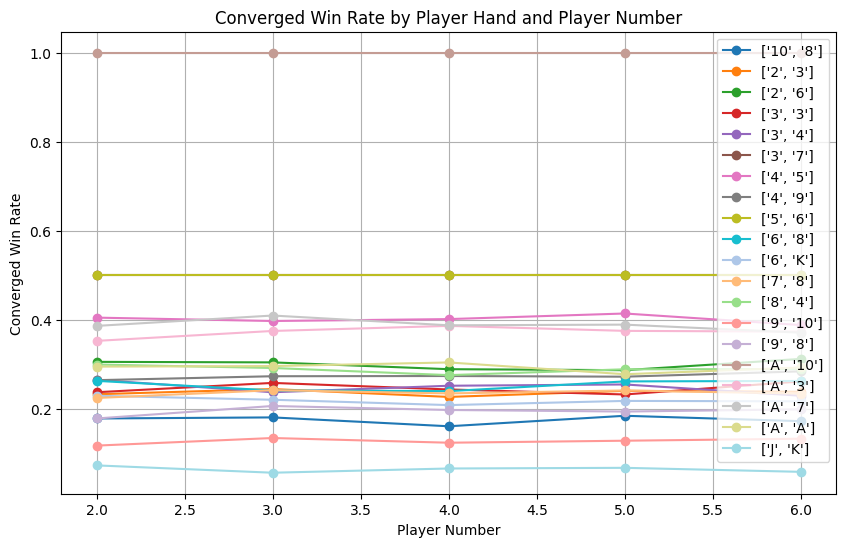

In [6]:
# Filter the DataFrame to include rows where player number is equal to 2
filtered_df = df_h[df_h['Deck#'] == 8]

# Group the filtered DataFrame by player hand
grouped_df = filtered_df.groupby('Player_Hand')

# Set up the plot
plt.figure(figsize=(10, 6))
colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5',
    '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5'
]  # Specify colors for each player hand

# Iterate over each player hand and plot the line graph
for i, (player_hand, data) in enumerate(grouped_df):
    x = data['Player#']
    y = data['Converged Win Rate']
    color = colors[i % len(colors)]  # Use a color from the specified color list

    plt.plot(x, y, marker='o', linestyle='-', color=color, label=player_hand)

# Set the plot title and labels
plt.title('Converged Win Rate by Player Hand and Player Number')
plt.xlabel('Player Number')
plt.ylabel('Converged Win Rate')

# Add a legend and grid
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [7]:
df_s = pd.read_csv('/content/Evaluation_Stand.csv')

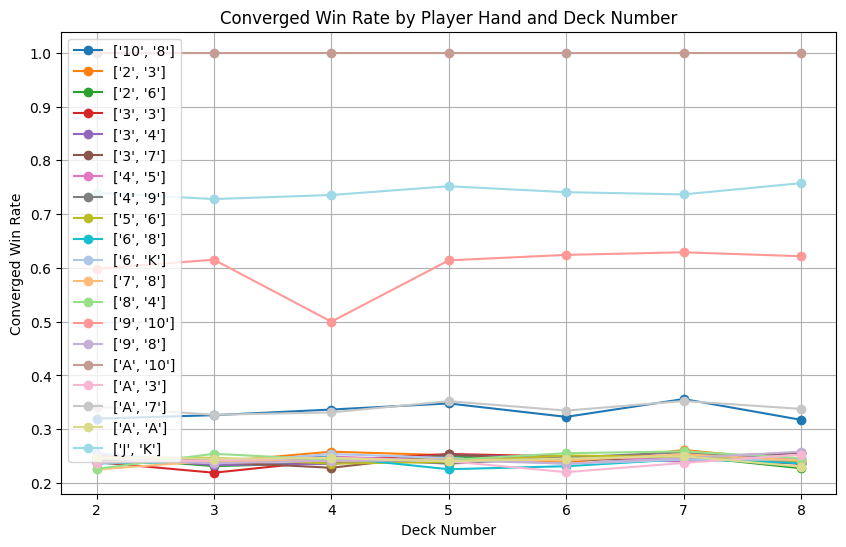

In [8]:
# Convert the 'Player_Hand' column values to strings
df_s['Player_Hand'] = df_s['Player_Hand'].astype(str)

# Filter the DataFrame to include rows where player number is equal to 2
filtered_df = df_s[df_s['Player#'] == 6]

# Group the filtered DataFrame by player hand
grouped_df = filtered_df.groupby('Player_Hand')

# Set up the plot
plt.figure(figsize=(10, 6))
colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5',
    '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5'
]  # Specify colors for each player hand

# Iterate over each player hand and plot the line graph
for i, (player_hand, data) in enumerate(grouped_df):
    x = data['Deck#']
    y = data['Converged Win Rate']
    color = colors[i % len(colors)]  # Use a color from the specified color list

    plt.plot(x, y, marker='o', linestyle='-', color=color, label=player_hand)

# Set the plot title and labels
plt.title('Converged Win Rate by Player Hand and Deck Number')
plt.xlabel('Deck Number')
plt.ylabel('Converged Win Rate')

# Add a legend and grid
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

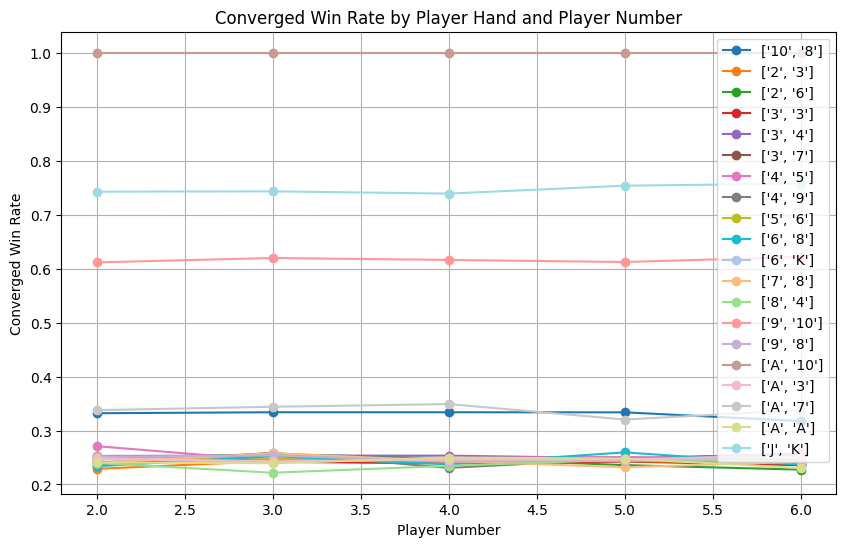

In [9]:
# Filter the DataFrame to include rows where player number is equal to 2
filtered_df = df_s[df_s['Deck#'] == 8]

# Group the filtered DataFrame by player hand
grouped_df = filtered_df.groupby('Player_Hand')

# Set up the plot
plt.figure(figsize=(10, 6))
colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5',
    '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5'
]  # Specify colors for each player hand

# Iterate over each player hand and plot the line graph
for i, (player_hand, data) in enumerate(grouped_df):
    x = data['Player#']
    y = data['Converged Win Rate']
    color = colors[i % len(colors)]  # Use a color from the specified color list

    plt.plot(x, y, marker='o', linestyle='-', color=color, label=player_hand)

# Set the plot title and labels
plt.title('Converged Win Rate by Player Hand and Player Number')
plt.xlabel('Player Number')
plt.ylabel('Converged Win Rate')

# Add a legend and grid
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

# Check Strategy changes(HSDD)
Player#=6,Deck#=8
Initail hand = testinghand
for card_input in testingHand:
dealer = '8'

In [ ]:
def _sort_cards_(cards: list[str]):
    order = {
        '1': 1,
        '2': 2,
        '3': 3,
        '4': 4,
        '5': 5,
        '6': 6,
        '7': 7,
        '8': 8,
        '9': 9,
        '10': 10,
        'J': 11,
        'Q': 12,
        'K': 13,
        'A': 14}
    return sorted(cards, key=order.get)

def _check_score_ (
            hand: List[str]
            ):
    mapping = {
        '1': 1,
        '2': 2,
        '3': 3,
        '4': 4,
        '5': 5,
        '6': 6,
        '7': 7,
        '8': 8,
        '9': 9,
        '10': 10,
        'J': 10,
        'Q': 10,
        'K': 10

    }
    tot_score = 0
    sort_hand = _sort_cards_(hand)
    #print(f"Sorted player hand: {sort_hand}")
    #mapping.get(template,'Probelm with _convert_')

    for card in sort_hand:
      if card != 'A':
        tot_score += mapping.get(card,"Incorrect value")
      elif card == 'A' and tot_score <= 10:
        tot_score += 11
      elif card == 'A' and tot_score >10:
        tot_score += 1
      else:
        raise Exception("An error occurred in _check_score_ function")
    return tot_score

Hiting

In [ ]:
score = _check_score_(hand = ['2','3'])

In [ ]:
results_H = []
for card_input in testingHand:
  rounds = 0
  prev_win_rate = 0
  ROC = 0#rate of change of win
  CROC = 1#Change of ROC
  prev_ROC = 1
  total_wins = 0
  tot_score = 0
  avg_score = 0
  while CROC > 0.001 or rounds < 100:
          #print("Test here2: ", dealer_inputs[i])
          player_hand_set = copy.deepcopy(card_input)
          initial_score = _check_score_(player_hand_set)
          y = blackjack(player_hand= player_hand_set, dealer_hand = ['8'], no_of_other_player_B4 = 6, no_of_other_player_after = 6, no_of_deck = 8,strategy='H')
          result, player_score = y.game_start()
          rounds = rounds + 1
          tot_score = player_score + tot_score
          avg_score = tot_score / rounds
          if result == 1:
            total_wins += 1

          win_rate = total_wins / rounds
          if abs(win_rate - prev_win_rate) !=0 :
            ROC = abs(win_rate - prev_win_rate)
            CROC = abs(1 - ROC / prev_ROC)
          prev_win_rate = win_rate
          if ROC !=0:
            prev_ROC = ROC
          else:
            prev_ROC = 1
          if rounds > 100 and CROC == 1:
            print("Terminated as always 0\n","Rounds: ",rounds, "\nConverged Win Rate: ", win_rate,"\nROC: ",ROC)
            break
          elif rounds > 100 and CROC == 0:
            print("Terminated as Player always win\n","Rounds: ",rounds, "\nConverged Win Rate: ", win_rate,"\nROC: ",ROC)
            break
          player_hand_set = copy.deepcopy(card_input)

  results_H.append([card_input, initial_score, win_rate, avg_score])
  #print('player_hand:',card_input,'\nConverged Win Rate: ', win_rate,"\nAVG HAND",avg_score)


          #print("Rounds: ",rounds, "\nConverged Win Rate: ", win_rate,"\nROC: ",ROC)


In [ ]:
results_H

[[['2', '3'], 5, 0.238, 12.2825],
 [['3', '3'], 6, 0.23926073926073926, 13.382117882117882],
 [['3', '4'], 7, 0.2581128307538692, 14.448826759860209],
 [['2', '6'], 8, 0.3011448481831757, 15.268292682926829],
 [['4', '5'], 9, 0.42, 16.4335],
 [['3', '7'], 10, 0.471, 17.3025],
 [['5', '6'], 11, 0.5244755244755245, 17.53996003996004],
 [['8', '4'], 12, 0.2757242757242757, 18.57892107892108],
 [['4', '9'], 13, 0.2768615692153923, 19.40279860069965],
 [['6', '8'], 14, 0.2475, 20.6095],
 [['7', '8'], 15, 0.23338330834582707, 21.58920539730135],
 [['6', 'K'], 16, 0.2155, 22.522],
 [['9', '8'], 17, 0.2048975512243878, 23.431784107946026],
 [['10', '8'], 18, 0.16391804097951024, 24.56671664167916],
 [['9', '10'], 19, 0.1374312843578211, 25.455772113943027],
 [['J', 'K'], 20, 0.063968015992004, 26.581709145427286],
 [['A', '10'], 21, 1.0, 21.0],
 [['A', 'A'], 12, 0.2892107892107892, 18.52947052947053],
 [['A', '3'], 14, 0.36445332001997005, 15.888167748377434],
 [['A', '7'], 18, 0.3825, 16.806]

Stand

In [ ]:
results_S = []
for card_input in testingHand:
  rounds = 0
  prev_win_rate = 0
  ROC = 0#rate of change of win
  CROC = 1#Change of ROC
  prev_ROC = 1
  total_wins = 0
  tot_score = 0
  avg_score = 0
  while CROC > 0.001 or rounds < 100:
          #print("Test here2: ", dealer_inputs[i])
          player_hand_set = copy.deepcopy(card_input)
          initial_score = _check_score_(player_hand_set)
          y = blackjack(player_hand= player_hand_set, dealer_hand = ['8'], no_of_other_player_B4 = 6, no_of_other_player_after = 6, no_of_deck = 8,strategy='S')
          result, player_score = y.game_start()
          rounds = rounds + 1
          tot_score = player_score + tot_score
          avg_score = tot_score / rounds
          if result == 1:
            total_wins += 1

          win_rate = total_wins / rounds
          if abs(win_rate - prev_win_rate) !=0 :
            ROC = abs(win_rate - prev_win_rate)
            CROC = abs(1 - ROC / prev_ROC)
          prev_win_rate = win_rate
          if ROC !=0:
            prev_ROC = ROC
          else:
            prev_ROC = 1
          if rounds > 100 and CROC == 1:
            print("Terminated as always 0\n","Rounds: ",rounds, "\nConverged Win Rate: ", win_rate,"\nROC: ",ROC)
            break
          elif rounds > 100 and CROC == 0:
            print("Terminated as Player always win\n","Rounds: ",rounds, "\nConverged Win Rate: ", win_rate,"\nROC: ",ROC)
            break
          player_hand_set = copy.deepcopy(card_input)

  results_S.append([card_input, initial_score, win_rate, avg_score])
  #print('player_hand:',card_input,'\nConverged Win Rate: ', win_rate,"\nAVG HAND",avg_score)


          #print("Rounds: ",rounds, "\nConverged Win Rate: ", win_rate,"\nROC: ",ROC)


In [ ]:
results_S

[[['2', '3'], 5, 0.244, 5.0],
 [['3', '3'], 6, 0.2385, 6.0],
 [['3', '4'], 7, 0.2455, 7.0],
 [['2', '6'], 8, 0.24887556221889057, 8.0],
 [['4', '5'], 9, 0.23338330834582707, 9.0],
 [['3', '7'], 10, 0.2463768115942029, 10.0],
 [['5', '6'], 11, 0.2518740629685157, 11.0],
 [['8', '4'], 12, 0.24775224775224775, 12.0],
 [['4', '9'], 13, 0.2368815592203898, 13.0],
 [['6', '8'], 14, 0.23276723276723277, 14.0],
 [['7', '8'], 15, 0.2303848075962019, 15.0],
 [['6', 'K'], 16, 0.22288855572213892, 16.0],
 [['9', '8'], 17, 0.23338330834582707, 17.0],
 [['10', '8'], 18, 0.316, 18.0],
 [['9', '10'], 19, 0.6155, 19.0],
 [['J', 'K'], 20, 0.753, 20.0],
 [['A', '10'], 21, 1.0, 21.0],
 [['A', 'A'], 12, 0.255, 12.0],
 [['A', '3'], 14, 0.23826173826173827, 14.0],
 [['A', '7'], 18, 0.3288355822088955, 18.0]]

In [ ]:
score_dict_S = defaultdict(list)

# Group winrates by score
for item in results_S:
    score = item[1]
    winrate = item[2]
    score_dict_S[score].append(winrate)

# Calculate the average winrate for each score
averaged_winrates_S = []
for score, winrates in score_dict_S.items():
    avg_winrate = sum(winrates) / len(winrates)
    averaged_winrates_S.append([score, avg_winrate])

print(averaged_winrates_S)

[[5, 0.244], [6, 0.2385], [7, 0.2455], [8, 0.24887556221889057], [9, 0.23338330834582707], [10, 0.2463768115942029], [11, 0.2518740629685157], [12, 0.25137612387612385], [13, 0.2368815592203898], [14, 0.2355144855144855], [15, 0.2303848075962019], [16, 0.22288855572213892], [17, 0.23338330834582707], [18, 0.3224177911044478], [19, 0.6155], [20, 0.753], [21, 1.0]]


In [ ]:
import pandas as pd

# Extract the relevant data from results_H and results_S
converged_winrate_h = [[item[2],item[3]] for item in results_H]
converged_winrate_s = [[item[2],item[3]] for item in results_S]

# Create a DataFrame with column '8' and row index from results_S[1]
df = pd.DataFrame(index=list(set([item[1] for item in results_S])), columns=['8'])

# Compare converged win rates and populate the DataFrame
count = 0
for item in results_S:
    index = item[1]
    winrate_s = item[2]
    winrate_h = converged_winrate_h[count][0]  # Adjusting index to match the range
    df.loc[index, '8'] = max(winrate_s, winrate_h)
    count +=1

# Display the resulting DataFrame
print(df)

           8
5      0.244
6   0.239261
7   0.258113
8   0.301145
9       0.42
10     0.471
11  0.524476
12  0.289211
13  0.276862
14  0.364453
15  0.233383
16  0.222889
17  0.233383
18    0.3825
19    0.6155
20     0.753
21       1.0


In [ ]:
import pandas as pd

# Extract the relevant data from results_H and results_S
converged_winrate_h = [[item[2], item[3]] for item in results_H]
converged_winrate_s = [[item[2], item[3]] for item in results_S]

# Create a DataFrame with column '8' and row index from results_S[1]
df = pd.DataFrame(index=list(set([item[1] for item in results_S])), columns=['8'])



In [ ]:
converged_winrate_h

[[0.238, 12.2825],
 [0.23926073926073926, 13.382117882117882],
 [0.2581128307538692, 14.448826759860209],
 [0.3011448481831757, 15.268292682926829],
 [0.42, 16.4335],
 [0.471, 17.3025],
 [0.5244755244755245, 17.53996003996004],
 [0.2757242757242757, 18.57892107892108],
 [0.2768615692153923, 19.40279860069965],
 [0.2475, 20.6095],
 [0.23338330834582707, 21.58920539730135],
 [0.2155, 22.522],
 [0.2048975512243878, 23.431784107946026],
 [0.16391804097951024, 24.56671664167916],
 [0.1374312843578211, 25.455772113943027],
 [0.063968015992004, 26.581709145427286],
 [1.0, 21.0],
 [0.2892107892107892, 18.52947052947053],
 [0.36445332001997005, 15.888167748377434],
 [0.3825, 16.806]]

In [ ]:
rounded_converged_winrate_h = [[item[0], round(item[1])] for item in converged_winrate_h]

print(rounded_converged_winrate_h)


[[0.238, 12], [0.23926073926073926, 13], [0.2581128307538692, 14], [0.3011448481831757, 15], [0.42, 16], [0.471, 17], [0.5244755244755245, 18], [0.2757242757242757, 19], [0.2768615692153923, 19], [0.2475, 21], [0.23338330834582707, 22], [0.2155, 23], [0.2048975512243878, 23], [0.16391804097951024, 25], [0.1374312843578211, 25], [0.063968015992004, 27], [1.0, 21], [0.2892107892107892, 19], [0.36445332001997005, 16], [0.3825, 17]]


In [ ]:
from collections import defaultdict

score_dict = defaultdict(list)

# Group winrates by average score
for winrate, score in rounded_converged_winrate_h:
    score_dict[score].append(winrate)

# Calculate the average winrate for each average score
averaged_winrates_h = []
for score, winrates in score_dict.items():
    avg_winrate = sum(winrates) / len(winrates)
    averaged_winrates_h.append([avg_winrate, score])

print(averaged_winrates_h)

[[0.238, 12], [0.23926073926073926, 13], [0.2581128307538692, 14], [0.3011448481831757, 15], [0.392226660009985, 16], [0.42674999999999996, 17], [0.5244755244755245, 18], [0.28059887805015243, 19], [0.62375, 21], [0.23338330834582707, 22], [0.2101987756121939, 23], [0.15067466266866567, 25], [0.063968015992004, 27]]


In [ ]:
averaged_winrates_S

[[5, 0.244],
 [6, 0.2385],
 [7, 0.2455],
 [8, 0.24887556221889057],
 [9, 0.23338330834582707],
 [10, 0.2463768115942029],
 [11, 0.2518740629685157],
 [12, 0.25137612387612385],
 [13, 0.2368815592203898],
 [14, 0.2355144855144855],
 [15, 0.2303848075962019],
 [16, 0.22288855572213892],
 [17, 0.23338330834582707],
 [18, 0.3224177911044478],
 [19, 0.6155],
 [20, 0.753],
 [21, 1.0]]

HS table

In [ ]:
# Compare converged win rates and populate the DataFrame
import decimal
count = 0
for item in averaged_winrates_S:
    index = item[0]
    winrate_s = item[1]
    winrate_h = rounded_converged_winrate_h[count][0]

    if winrate_s > winrate_h:
        strategy = 'S'
        winrate = winrate_s
        avg_score = averaged_winrates_S[count][0]
    elif winrate_h >= winrate_s:
        strategy = 'H'
        winrate = winrate_h
        avg_score = rounded_converged_winrate_h[count][1]
    if winrate_h == 1 :
      strategy = 'S'
      winrate = winrate_s
      avg_score = averaged_winrates_S[count][0]
    entry = [strategy, winrate, avg_score]
    df.loc[index, '8'] = entry

    count += 1

# Display the resulting DataFrame
print(df)

                               8
5                  [S, 0.244, 5]
6   [H, 0.23926073926073926, 13]
7    [H, 0.2581128307538692, 14]
8    [H, 0.3011448481831757, 15]
9                  [H, 0.42, 16]
10                [H, 0.471, 17]
11   [H, 0.5244755244755245, 18]
12   [H, 0.2757242757242757, 19]
13   [H, 0.2768615692153923, 19]
14               [H, 0.2475, 21]
15  [H, 0.23338330834582707, 22]
16  [S, 0.22288855572213892, 16]
17  [S, 0.23338330834582707, 17]
18   [S, 0.3224177911044478, 18]
19               [S, 0.6155, 19]
20                [S, 0.753, 20]
21                  [S, 1.0, 21]


In [ ]:
df

,8
5,"[S, 0.244, 5]"
6,"[H, 0.23926073926073926, 13]"
7,"[H, 0.2581128307538692, 14]"
8,"[H, 0.3011448481831757, 15]"
9,"[H, 0.42, 16]"
10,"[H, 0.471, 17]"
11,"[H, 0.5244755244755245, 18]"
12,"[H, 0.2757242757242757, 19]"
13,"[H, 0.2768615692153923, 19]"
14,"[H, 0.2475, 21]"


Double Down

In [ ]:

updated_data = df.copy()  # Create a copy of the data to store the updated strategies

for i, row in df.iterrows():
    strategy = row['8'][0]
    if strategy == 'S':
      continue
    # Check if the strategy is 'H'
    if strategy == 'H':
        avg_score = row['8'][2]  # Get the avg_score of the initial row
        converged_win_rate = row['8'][1]

        # Find the row with the same avg_score as the initial row
    initial_row = df.loc[df.index == avg_score]

    if not initial_row.empty:
        object_row_strategy = initial_row.at[avg_score, '8'][0]

        # Compare the strategies and update if necessary
        if object_row_strategy == 'S':
            updated_data.at[i, '8'] = ['DD', converged_win_rate, avg_score]
        else:
            initial_row_index = initial_row.index[0]
            current_row_index = row.name

            if initial_row_index <= current_row_index:
                updated_data.at[i, '8'] = ['DD', converged_win_rate, avg_score]

#print(updated_data)

In [ ]:
updated_data

,8
5,"[S, 0.244, 5]"
6,"[H, 0.23926073926073926, 13]"
7,"[H, 0.2581128307538692, 14]"
8,"[H, 0.3011448481831757, 15]"
9,"[DD, 0.42, 16]"
10,"[DD, 0.471, 17]"
11,"[DD, 0.5244755244755245, 18]"
12,"[DD, 0.2757242757242757, 19]"
13,"[DD, 0.2768615692153923, 19]"
14,"[DD, 0.2475, 21]"


In [ ]:
updated_data.to_csv('Single_case_HSDD_table.csv')

# Check Strategy changes(Split)

In [ ]:
split_df = pd.read_excel('/content/Split_table_new_paras.xlsx')

In [ ]:
split_df = split_df.rename(columns={split_df.columns[5]: "Weighted_WinRate"})

In [ ]:
split_df["E_hand1"] = split_df["E_hand1"].round()
split_df["E_hand2"] = split_df["E_hand2"].round()

In [ ]:
split_df

,Deck#,Player#,player_Hand,E_hand1,E_hand2,Weighted_WinRate
0,8,6,"['2', '2']",9.0,9.0,0.651310
1,8,6,"['3', '3']",10.0,10.0,0.750000
2,8,6,"['4', '4']",11.0,11.0,0.750000
3,8,6,"['5', '5']",12.0,12.0,0.473451
4,8,6,"['6', '6']",13.0,13.0,0.438999
5,8,6,"['7', '7']",14.0,14.0,0.470546
6,8,6,"['8', '8']",15.0,15.0,0.433372
7,8,6,"['9', '9']",16.0,16.0,0.433744
8,8,6,"['10', '10']",17.0,17.0,0.421276
9,8,6,"['J', 'J']",17.0,17.0,0.421276


In [ ]:
split_df['strategy'] = ''

for i, row in split_df.iterrows():
    e_hand1 = row['E_hand1']
    avg_score = row['E_hand2']

    # Find the corresponding row in updated_data based on E_hand1
    corresponding_row = None
    for _, item in updated_data.iterrows():

        if item.name == e_hand1:
            corresponding_row = item
            break

    if corresponding_row is not None:
        updated_strategy = corresponding_row[0]
        updated_win_rate = float(corresponding_row['8'][1])
        split_win_rate = row['Weighted_WinRate']

        if split_win_rate < updated_win_rate:
            split_df.at[i, 'strategy'] = corresponding_row['8'][0]
        else:
            split_df.at[i, 'strategy'] = 'SP'
    else:
        split_df.at[i, 'strategy'] = 'SP'

# Print the updated split_df with the new "strategy" column
print(split_df)

    Deck#  Player#   player_Hand  E_hand1  E_hand2  Weighted_WinRate strategy
0       8        6    ['2', '2']      9.0      9.0          0.651310       SP
1       8        6    ['3', '3']     10.0     10.0          0.750000       SP
2       8        6    ['4', '4']     11.0     11.0          0.750000       SP
3       8        6    ['5', '5']     12.0     12.0          0.473451       SP
4       8        6    ['6', '6']     13.0     13.0          0.438999       SP
5       8        6    ['7', '7']     14.0     14.0          0.470546       SP
6       8        6    ['8', '8']     15.0     15.0          0.433372       SP
7       8        6    ['9', '9']     16.0     16.0          0.433744       SP
8       8        6  ['10', '10']     17.0     17.0          0.421276       SP
9       8        6    ['J', 'J']     17.0     17.0          0.421276       SP
10      8        6    ['Q', 'Q']     17.0     17.0          0.421276       SP
11      8        6    ['K', 'K']     17.0     17.0          0.42

In [ ]:
split_df.to_csv('Single_case_Split_table.csv')